In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples_4mu = [

     "4Mu_500GeV_0p25GeV_0p004mm",   
     "4Mu_500GeV_0p25GeV_0p04mm",
     "4Mu_500GeV_0p25GeV_0p4mm",
     "4Mu_500GeV_0p25GeV_2p0mm",
     "4Mu_500GeV_0p25GeV_4p0mm",
    
     "4Mu_500GeV_1p2GeV_0p019mm",
     "4Mu_500GeV_1p2GeV_0p19mm",
     "4Mu_500GeV_1p2GeV_1p9mm",
     "4Mu_500GeV_1p2GeV_9p6mm",
     "4Mu_500GeV_1p2GeV_19p0mm",
    
     "4Mu_500GeV_5p0GeV_0p08mm",
     "4Mu_500GeV_5p0GeV_0p8mm",
     "4Mu_500GeV_5p0GeV_8p0mm",
     "4Mu_500GeV_5p0GeV_40p0mm",
     "4Mu_500GeV_5p0GeV_80p0mm",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged", location_cfg="signal_v7.yaml")

events_4mu = {}

for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/15 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-0p004_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-0p04_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-0p4_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-2p0_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-4p0_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-0p019_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-0p19_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-1p9_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-9p6_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-19p0_v2.root
root://xcache//store/user/dlee3/V2_v7/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcac

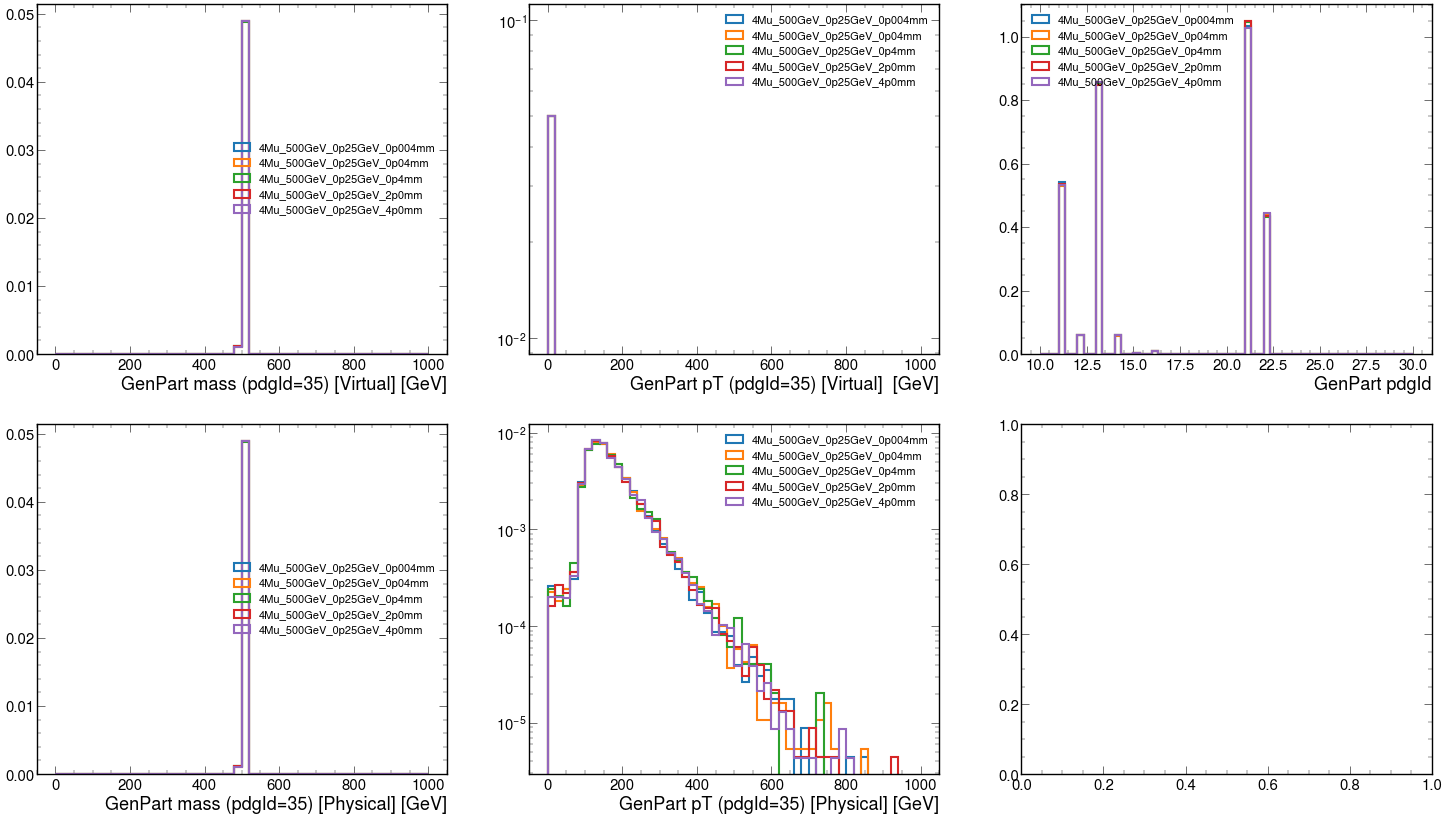

In [4]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in samples_4mu[0:5]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper left')

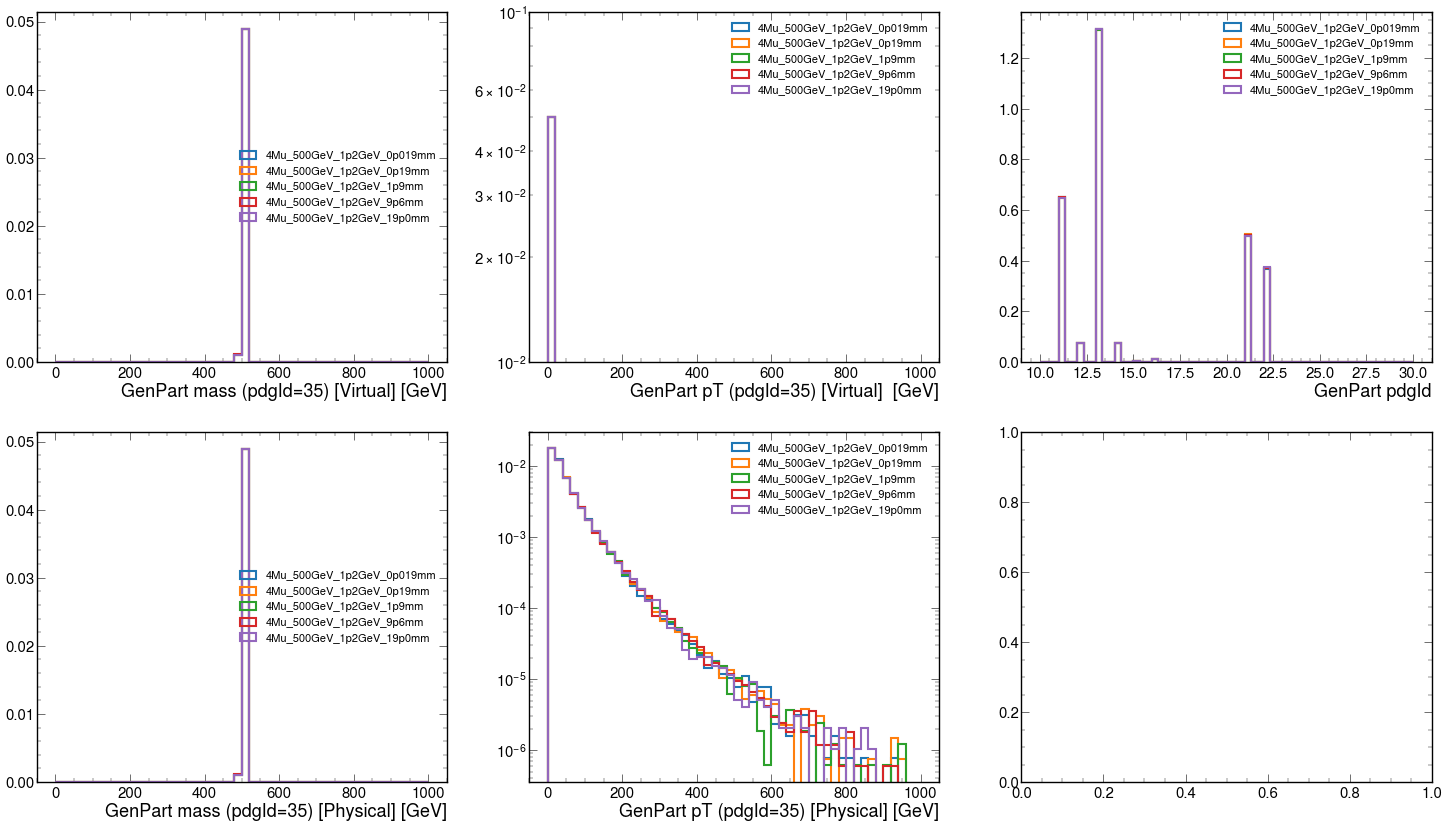

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in samples_4mu[5:10]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')

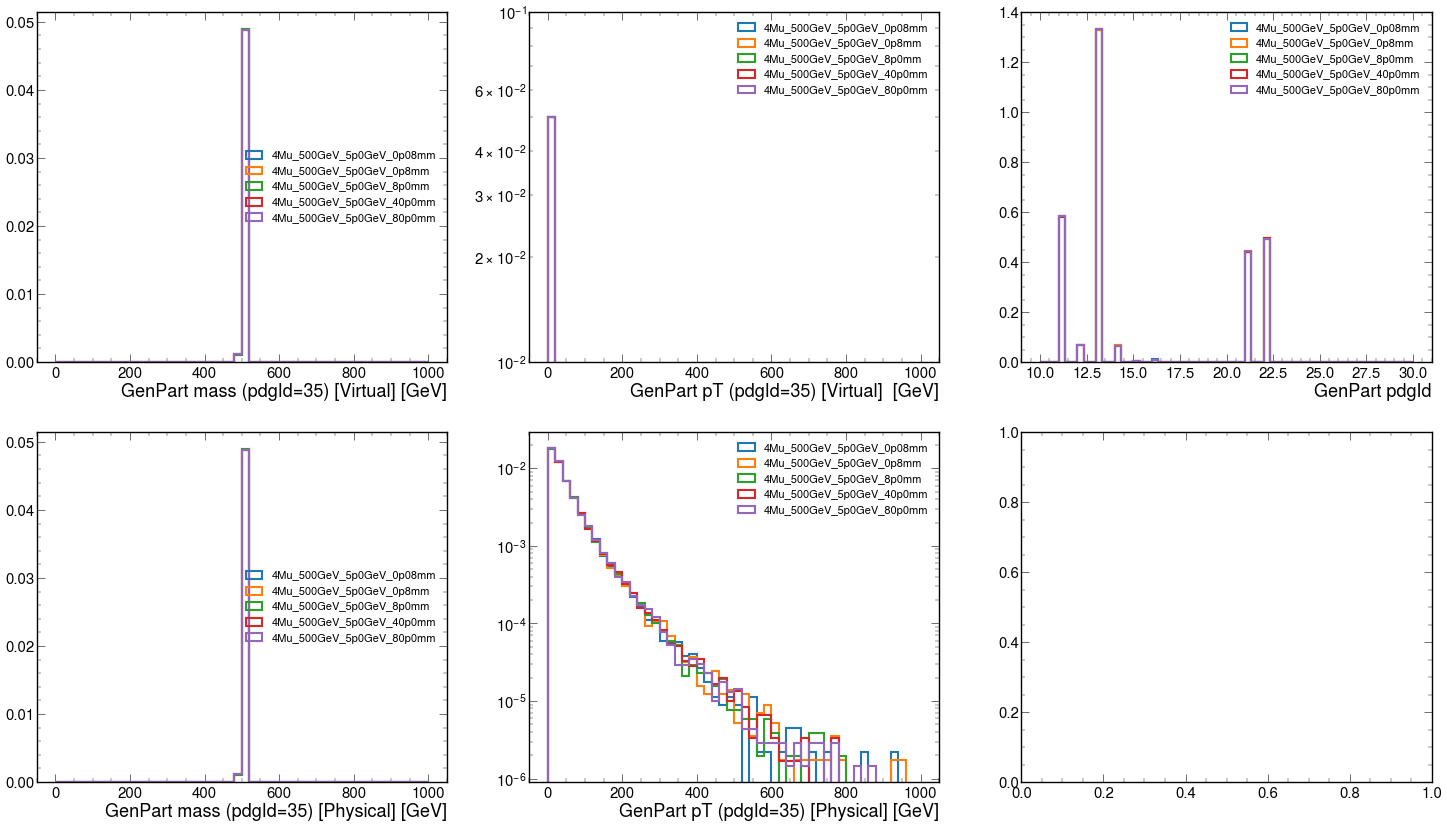

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in samples_4mu[10:15]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')

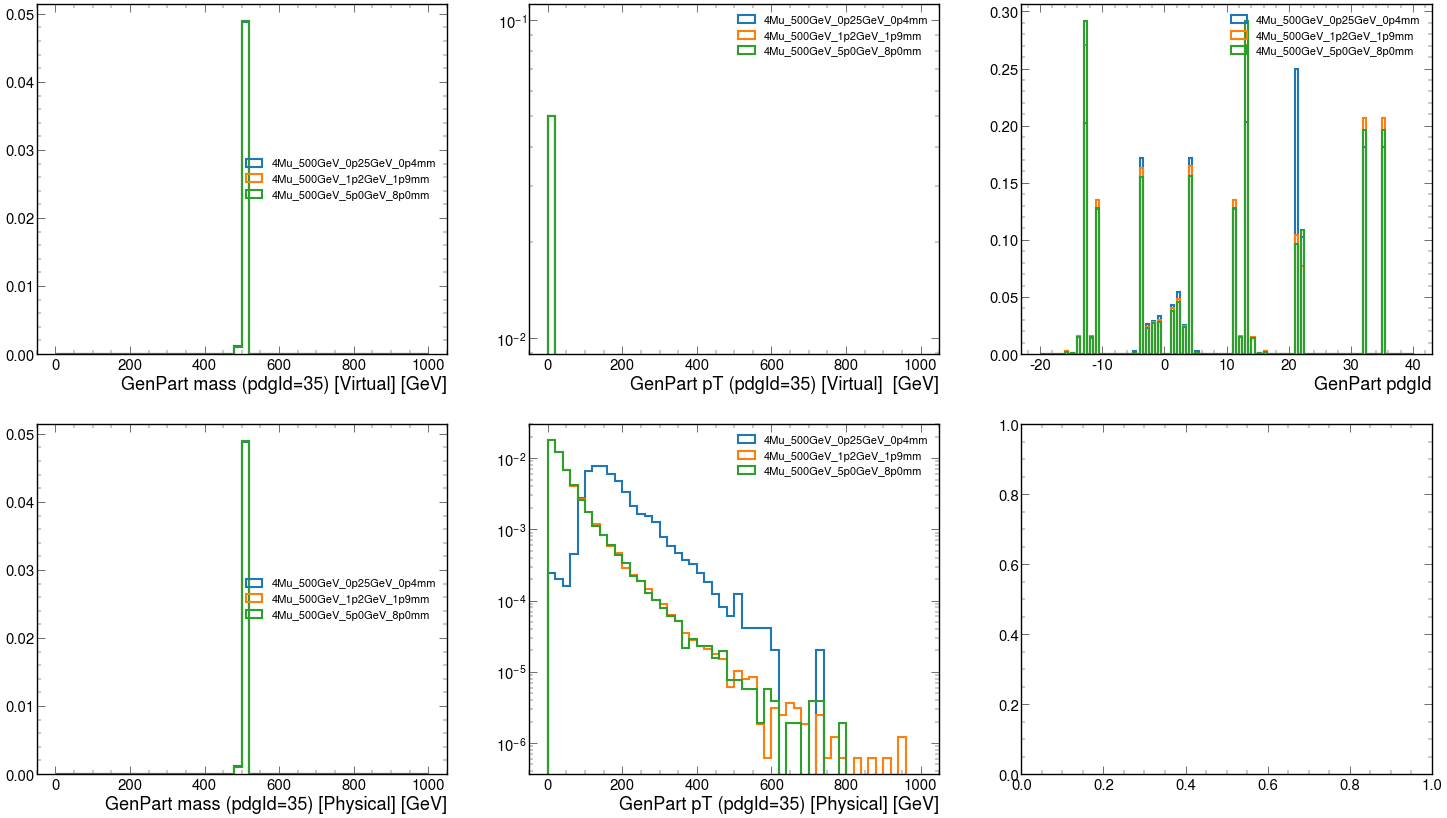

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in ["4Mu_500GeV_0p25GeV_0p4mm","4Mu_500GeV_1p2GeV_1p9mm","4Mu_500GeV_5p0GeV_8p0mm"]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(-20,40), alpha=1, bins=120, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')

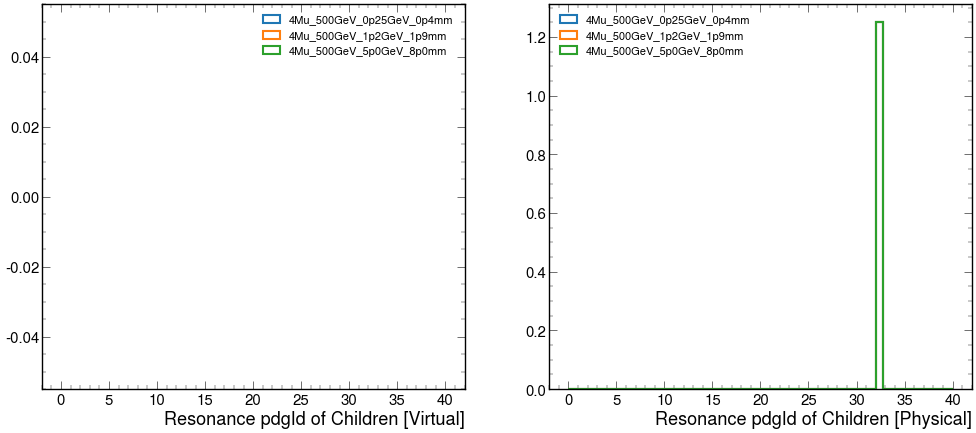

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))

for i_4mu in ["4Mu_500GeV_0p25GeV_0p4mm","4Mu_500GeV_1p2GeV_1p9mm","4Mu_500GeV_5p0GeV_8p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel_phy = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1) == 2)
    res_sel_vir = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1) != 2)
    dp_sel = (gen_parts.pdgId == 32)
    res_phy = gen_parts[res_sel_phy]
    res_vir = gen_parts[res_sel_vir]
    
    ax[0].hist(ak.flatten(gen_parts.pdgId)[ak.flatten(ak.flatten(res_vir.distinctChildrenIdxG))], range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1].hist(ak.flatten(gen_parts.pdgId)[ak.flatten(ak.flatten(res_phy.distinctChildrenIdxG))], range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0].set_xlabel('Resonance pdgId of Children [Virtual]')
ax[1].set_xlabel('Resonance pdgId of Children [Physical]')

ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

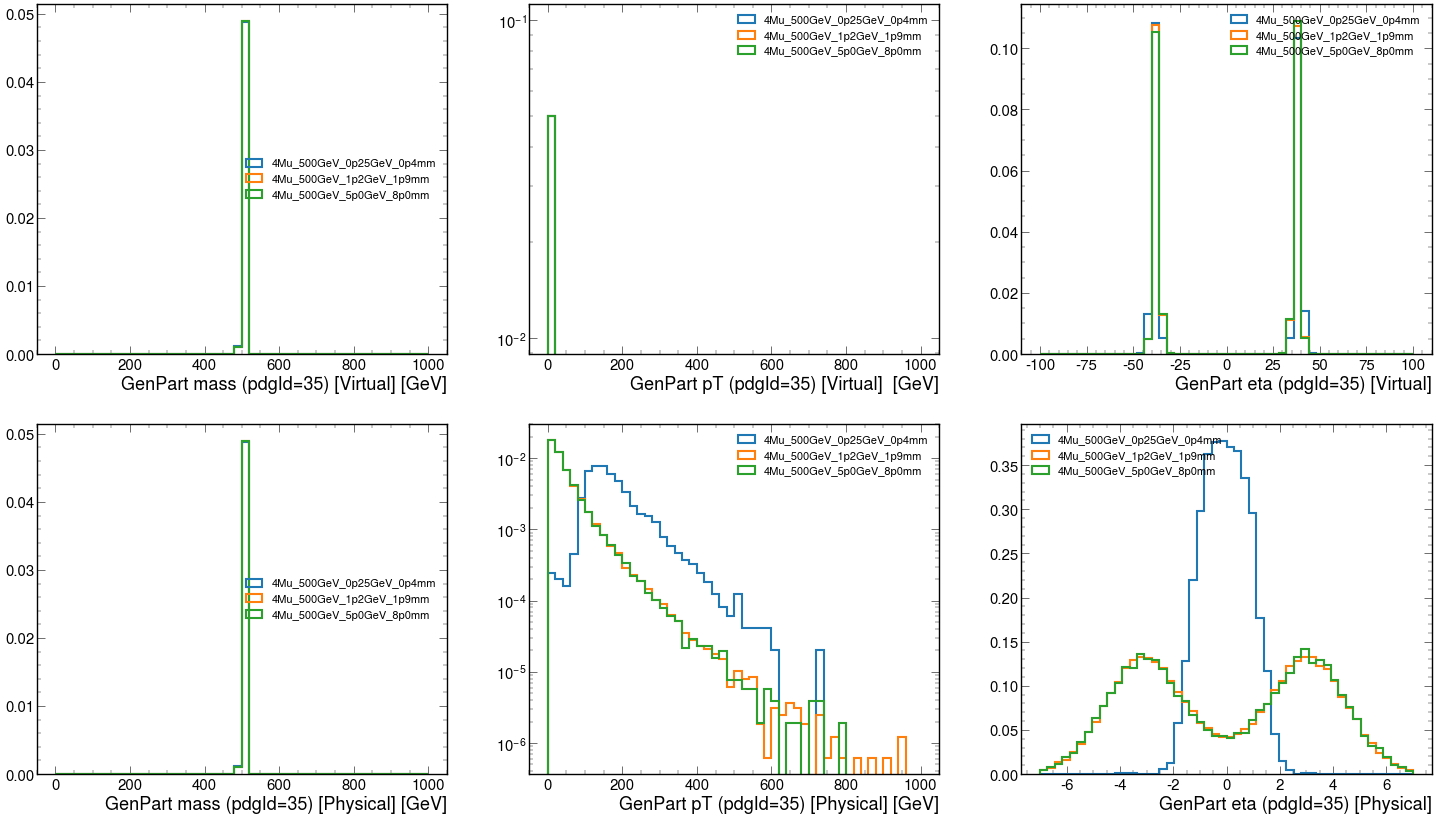

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in ["4Mu_500GeV_0p25GeV_0p4mm","4Mu_500GeV_1p2GeV_1p9mm","4Mu_500GeV_5p0GeV_8p0mm"]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].eta), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,2].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].eta), range=(-7,7), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[0,2].set_xlabel('GenPart eta (pdgId=35) [Virtual]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[1,2].set_xlabel('GenPart eta (pdgId=35) [Physical]')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[1,2].legend(fontsize=16, loc='upper left')

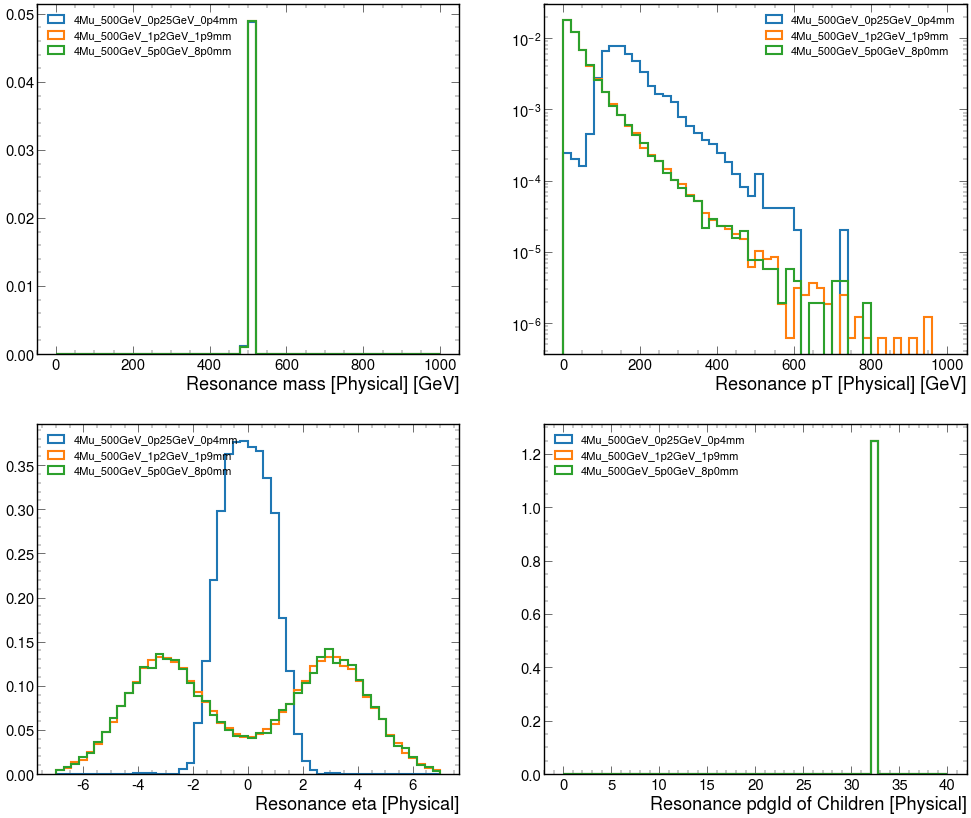

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for i_4mu in ["4Mu_500GeV_0p25GeV_0p4mm","4Mu_500GeV_1p2GeV_1p9mm","4Mu_500GeV_5p0GeV_8p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1) == 2)
    dp_sel = (gen_parts.pdgId == 32)
    res = gen_parts[res_sel]
    
    ax[0,0].hist(ak.flatten(res.mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(res.pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(res.eta), range=(-7,7), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(gen_parts.pdgId)[ak.flatten(ak.flatten(res.distinctChildrenIdxG))], range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")

ax[0,0].set_xlabel('Resonance mass [Physical] [GeV]')
ax[0,1].set_xlabel('Resonance pT [Physical] [GeV]')
ax[1,0].set_xlabel('Resonance eta [Physical]')
ax[1,1].set_xlabel('Resonance pdgId of Children [Physical]')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16, loc='upper left')
ax[1,1].legend(fontsize=16)

/opt/conda/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


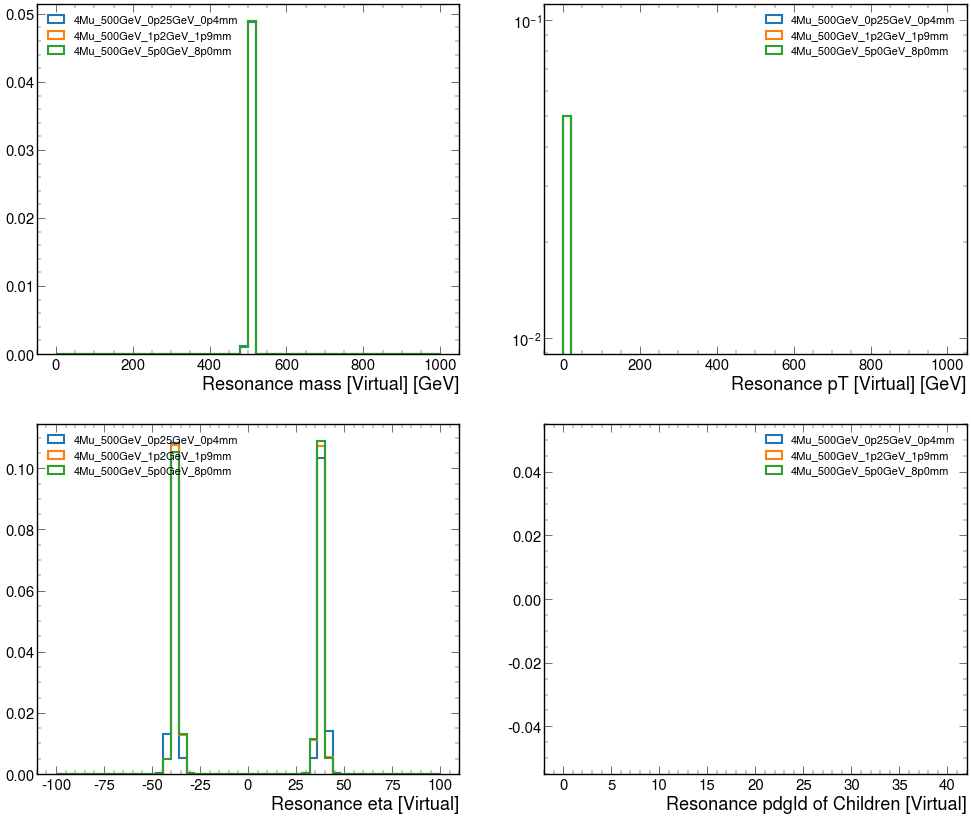

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for i_4mu in ["4Mu_500GeV_0p25GeV_0p4mm","4Mu_500GeV_1p2GeV_1p9mm","4Mu_500GeV_5p0GeV_8p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1) != 2)
    dp_sel = (gen_parts.pdgId == 32)
    res = gen_parts[res_sel]
    
    ax[0,0].hist(ak.flatten(res.mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(res.pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(res.eta), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(gen_parts.pdgId)[ak.flatten(ak.flatten(res.distinctChildrenIdxG))], range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")

ax[0,0].set_xlabel('Resonance mass [Virtual] [GeV]')
ax[0,1].set_xlabel('Resonance pT [Virtual] [GeV]')
ax[1,0].set_xlabel('Resonance eta [Virtual]')
ax[1,1].set_xlabel('Resonance pdgId of Children [Virtual]')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16, loc='upper left')
ax[1,1].legend(fontsize=16)

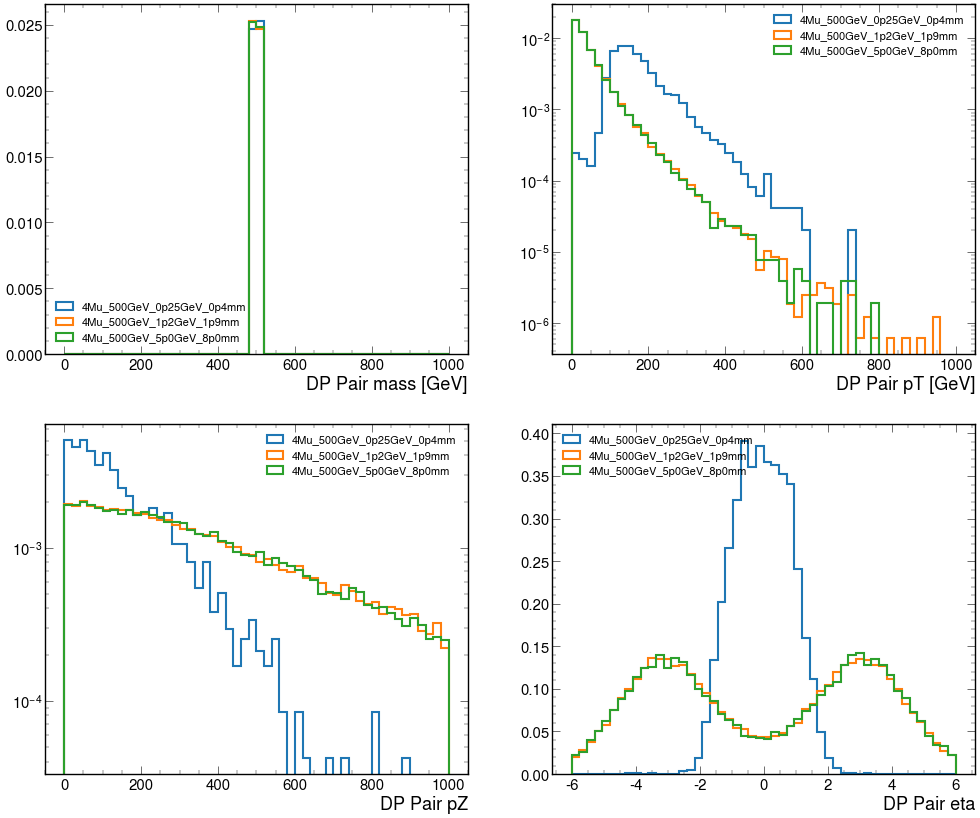

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for i_4mu in ["4Mu_500GeV_0p25GeV_0p4mm","4Mu_500GeV_1p2GeV_1p9mm","4Mu_500GeV_5p0GeV_8p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1)==2)
    dp_sel = (gen_parts.pdgId == 32)
    res = gen_parts[res_sel]
    dps = gen_parts[dp_sel]
    dps_pair = dps[:,:].sum()
    
    ax[0,0].hist(dps_pair.mass, range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(dps_pair.pt, range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(dps_pair.pz, range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(dps_pair.eta, range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    
ax[0,1].set_yscale("log")
ax[1,0].set_yscale("log")

ax[0,0].set_xlabel('DP Pair mass [GeV]')
ax[0,1].set_xlabel('DP Pair pT [GeV]')
ax[1,0].set_xlabel('DP Pair pZ')
ax[1,1].set_xlabel('DP Pair eta')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16, loc='upper right')
ax[1,1].legend(fontsize=16, loc='upper left')